<a href="https://colab.research.google.com/github/pantos1/dopp_ex3_city_livability/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from nltk import agreement


# Data-oriented programming paradigms
## Exercise 3 - Tasks 1 and 2
### Group 4

Piotr Antosiuk

Husein Gagajew 11775804

Johannes Fesl 11708466

## Loading Data
### Mercer Data:

In [11]:
def load_mercer_data():
    files = glob.glob('data/mercer_*.csv')
    datalist = []
    for file in files:
        year = int(file[12:16])
        df = pd.read_csv(file, sep=';', header=0, encoding='ISO-8859-1').assign(year=year)
        datalist.append(df)
        
    data = pd.concat(datalist)
    data.sort_values(['year'], ascending=True, inplace=True)
    data.set_index(['year', 'City'], inplace=True)
    data.index.set_names(['year', 'City'], inplace=True)
    return data

mercer_data = load_mercer_data()
mercer_data

Country  Rank
year City                          
2010 Vienna           Austria     1
     Canberra       Australia    26
     Calgary           Canada    28
     Singapore      Singapore    28
     Stuttgart        Germany    30
...                       ...   ...
2019 Brussels         Belgium    28
     Stuttgart        Germany    27
     Oslo              Norway    25
     Boston     United States    36
     Wroclaw           Poland   100

[347 rows x 2 columns]

## Numbeo data

In [12]:
def load_numbeo_city_data():
    files = glob.glob('data/numbeo/quality-of-life-city/*.csv')
    datalist = []
    for file in files:
        year = int(file[33:37])
        df = pd.read_csv(file, sep=';', header=0).assign(year=year)
        city_parts = df['City'].str.split(',', n = 1, expand = True)
        df['City'] = city_parts
        df['Country'] = city_parts[len(city_parts.columns) - 1]
        datalist.append(df)
        
    data = pd.concat(datalist)
    data.sort_values(['year'], ascending=True, inplace=True)
    data.set_index(['year', 'City'], inplace = True)
    data.index.set_names(['year', 'City'], inplace = True)
    return data

numbeo_city_data = load_numbeo_city_data()
numbeo_city_data

Rank  Quality of Life Index  Purchasing Power Index  \
year City                                                             
2012 Berlin        1                 215.25                  140.62   
     Pune         34                  69.20                   60.16   
     Istanbul     35                  55.71                   58.80   
     Warsaw       36                  51.96                   62.54   
     Budapest     37                  49.37                   39.19   
...              ...                    ...                     ...   
2019 Mangalore    80                 167.93                   69.57   
     Hamilton     81                 167.55                  125.58   
     Doha         82                 167.25                  135.96   
     Cologne      55                 177.21                  125.17   
     Caracas     226                   0.00                    3.86   

                Safety Index  Health Care Index  Cost of Living Index  \
year City                                                               
2012 Berlin            77.34              64.81                 89.06   
     Pune              60.47              68.06                 33.43   
     Istanbul          66.63              73.89                 77.93   
     Warsaw            60.57              49.19                 57.41   
     Budapest          70.16              64.81                 65.62   
...                      ...                ...                   ...   
2019 Mangalore         74.58              78.31                 23.25   
     Hamilton          52.83              82.51                 59.71   
     Doha              87.83              72.29                 58.90   
     Cologne           58.71              76.91                 67.19   
     Caracas           16.90              41.10                 25.01   

                Property Price to Income Ratio  Traffic Commute Time Index  \
year City                                                                    
2012 Berlin                               5.74                       23.00   
     Pune                                12.16                       65.33   
     Istanbul                             6.11                       74.40   
     Warsaw                              14.25                       46.25   
     Budapest                            10.49                       31.00   
...                                        ...                         ...   
2019 Mangalore                           14.16                       32.20   
     Hamilton                             6.22                       35.81   
     Doha                                 5.69                       31.66   
     Cologne                              9.21                       37.95   
     Caracas                            143.21                       40.32   

                Pollution Index Climate Index    Country  
year City                                                 
2012 Berlin               40.00             -    Germany  
     Pune                 71.67             -      India  
     Istanbul             90.00             -     Turkey  
     Warsaw               82.50             -     Poland  
     Budapest             90.25             -    Hungary  
...                         ...           ...        ...  
2019 Mangalore            27.21         66.65      India  
     Hamilton             48.53         61.06     Canada  
     Doha                 66.84         36.03      Qatar  
     Cologne              39.53         84.85    Germany  
     Caracas              73.51         99.93  Venezuela  

[1136 rows x 11 columns]

In [13]:
def load_numbeo_country_data():
    files = glob.glob('data/numbeo/quality-of-life-country/*.csv')
    datalist = []
    for file in files:
        year = file[36:40]
        df = pd.read_csv(file, sep=';', header=0).assign(year=year)
        datalist.append(df)
        
    data = pd.concat(datalist)
    
    data.set_index(['year', 'Country'], inplace = True)
    data.index.set_names(['year','Country'], inplace = True)
    return data

numbeo_country_data = load_numbeo_country_data()
numbeo_country_data

Rank  Quality of Life Index  \
year Country                                             
2012 Switzerland              1                 194.11   
     Germany                  2                 184.42   
     Norway                   3                 183.43   
     United Arab Emirates     4                 177.07   
     New Zealand              5                 174.28   
...                         ...                    ...   
2019 Philippines             67                  90.73   
     Vietnam                 68                  88.82   
     Kazakhstan              69                  87.17   
     Iran                    70                  87.02   
     Egypt                   71                  83.98   

                           Purchasing Power Index  Safety Index  \
year Country                                                      
2012 Switzerland                           127.42         74.22   
     Germany                               114.22         78.80   
     Norway                                 94.21         80.93   
     United Arab Emirates                  134.89         64.05   
     New Zealand                            88.59         53.19   
...                                           ...           ...   
2019 Philippines                            29.46         59.17   
     Vietnam                                33.33         51.22   
     Kazakhstan                             38.83         33.49   
     Iran                                   37.74         50.67   
     Egypt                                  23.67         49.29   

                           Health Care Index  Cost of Living Index  \
year Country                                                         
2012 Switzerland                       79.51                148.69   
     Germany                           71.96                 92.83   
     Norway                            79.04                166.65   
     United Arab Emirates              63.89                 80.79   
     New Zealand                       86.81                107.37   
...                                      ...                   ...   
2019 Philippines                       65.87                 35.09   
     Vietnam                           54.54                 37.70   
     Kazakhstan                        51.27                 29.83   
     Iran                              51.18                 35.80   
     Egypt                             44.22                 26.46   

                           Property Price to Income Ratio  \
year Country                                                
2012 Switzerland                                     6.53   
     Germany                                         4.80   
     Norway                                          7.10   
     United Arab Emirates                            4.49   
     New Zealand                                     5.71   
...                                                   ...   
2019 Philippines                                    21.83   
     Vietnam                                        19.66   
     Kazakhstan                                     11.51   
     Iran                                           16.87   
     Egypt                                          13.60   

                           Traffic Commute Time Index  Pollution Index  \
year Country                                                             
2012 Switzerland                                30.88            35.49   
     Germany                                    33.12            45.14   
     Norway                                     18.50            19.22   
     United Arab Emirates                       17.00            69.17   
     New Zealand                                25.25            17.08   
...                                               ...              ...   
2019 Philippines                                44.15            74.47   
     Vietnam                 

# How do city quality of life rankings change over time (e.g. Mercer,Quality of Life Index Numbeo)?
## Visualization of Ranking Changes in Mercer-Data:

This functions split the data into the median of all cities, and visualize the ranking changes for these cities  so that not all cities are displayed in one graph.
As you can see, the ranking differences get bigger when the rank of the cities is higher. But all in all, the rankings remain pretty stable over the years.

a:\develop\projects\tu\datenorientierte programmierparadigmen\dopp_ex3_city_livability\venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 2019.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
a:\develop\projects\tu\datenorientierte programmierparadigmen\dopp_ex3_city_livability\venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 2019.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


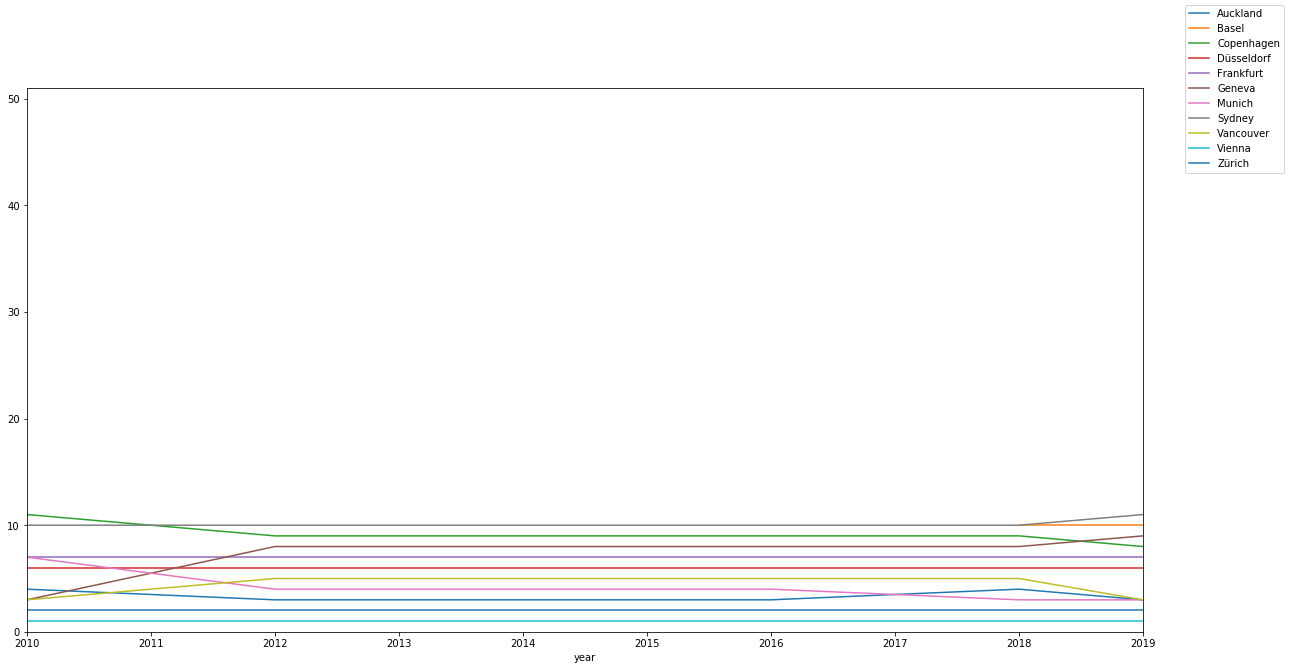

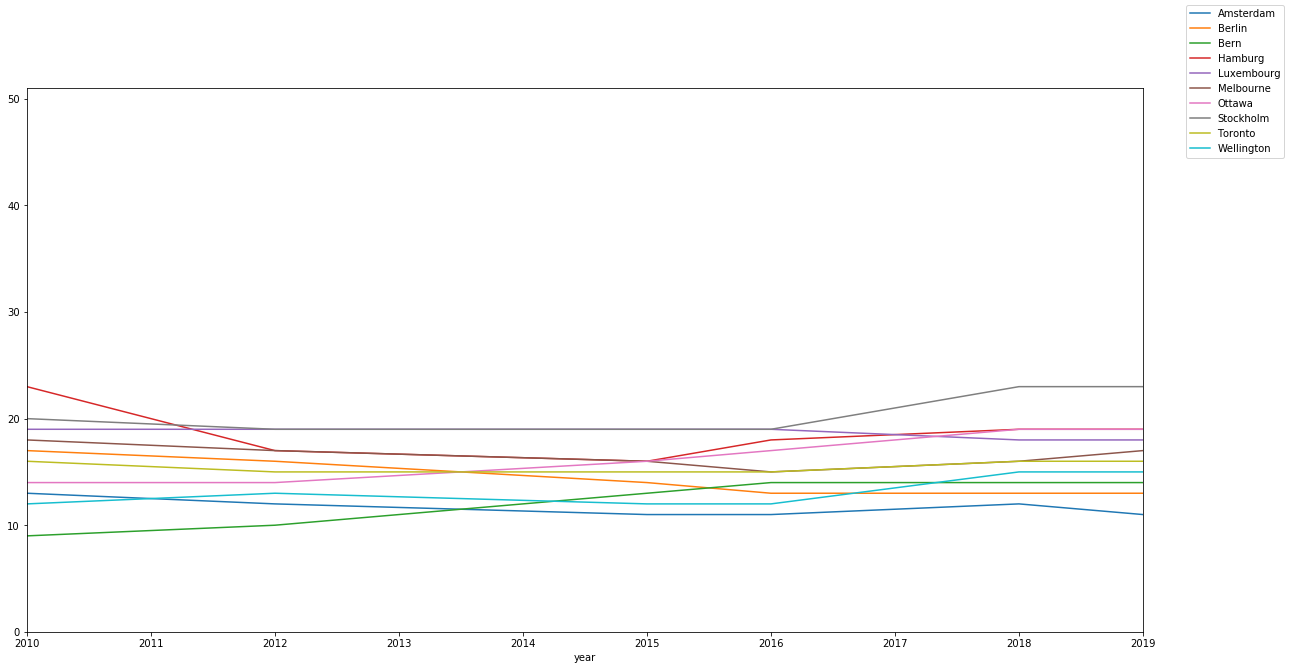

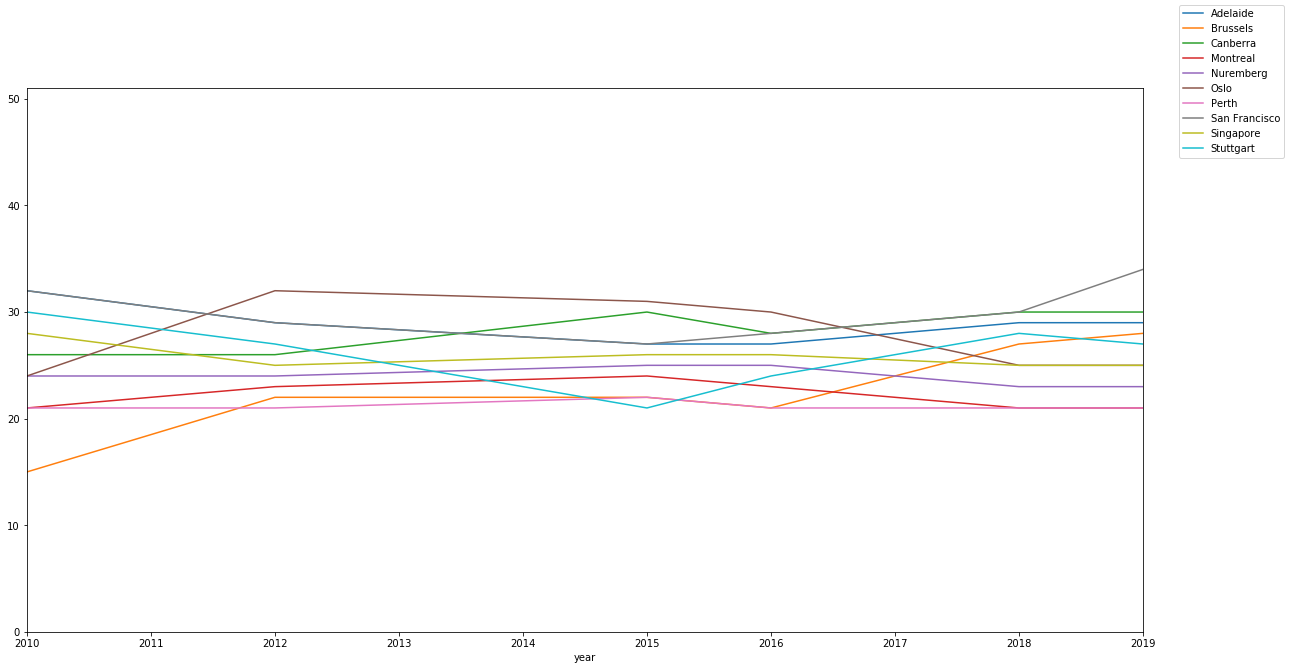

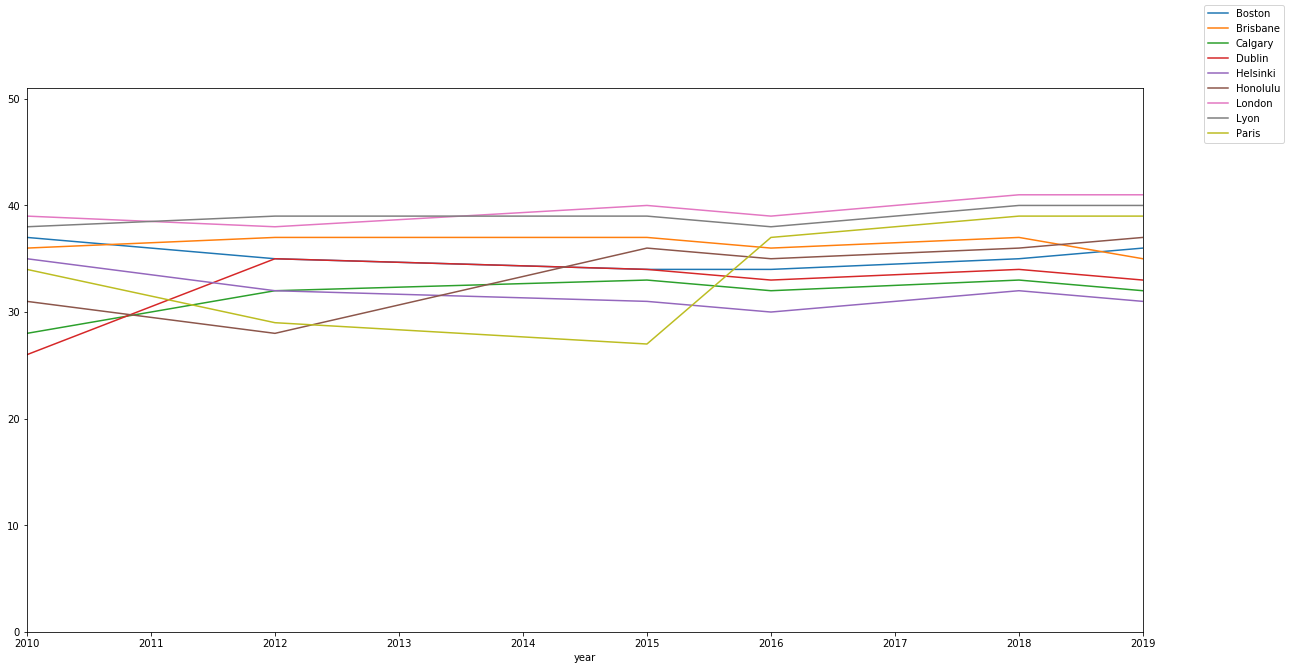

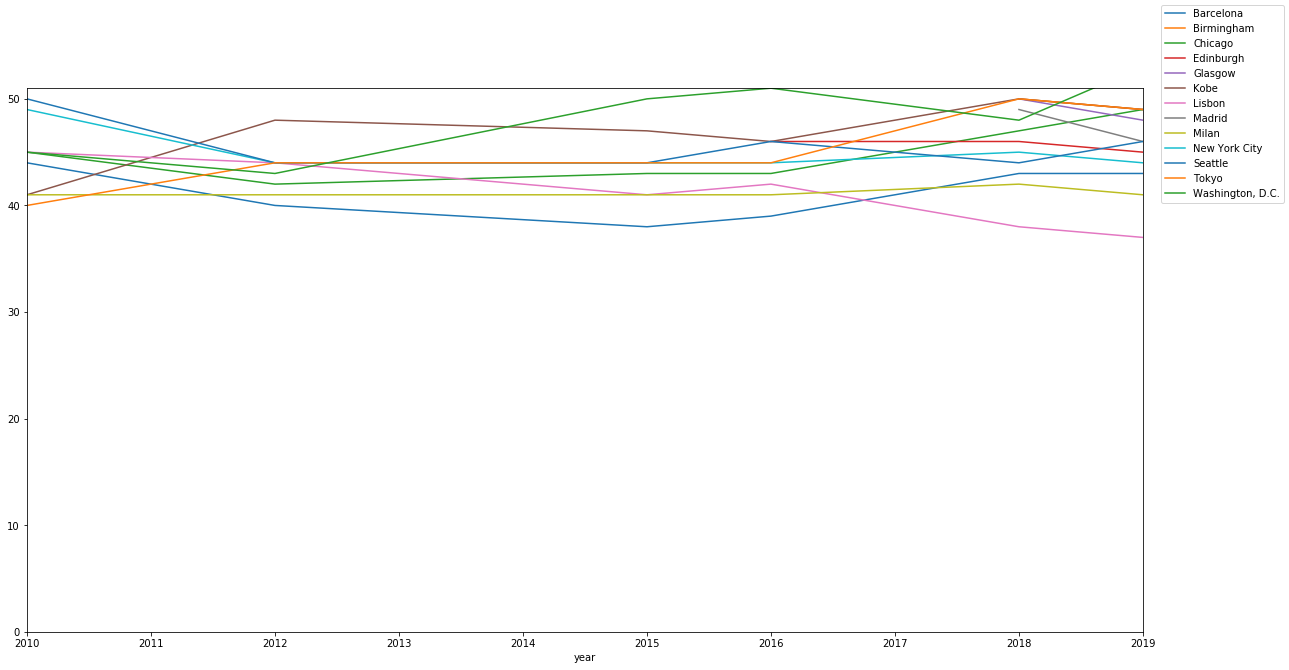

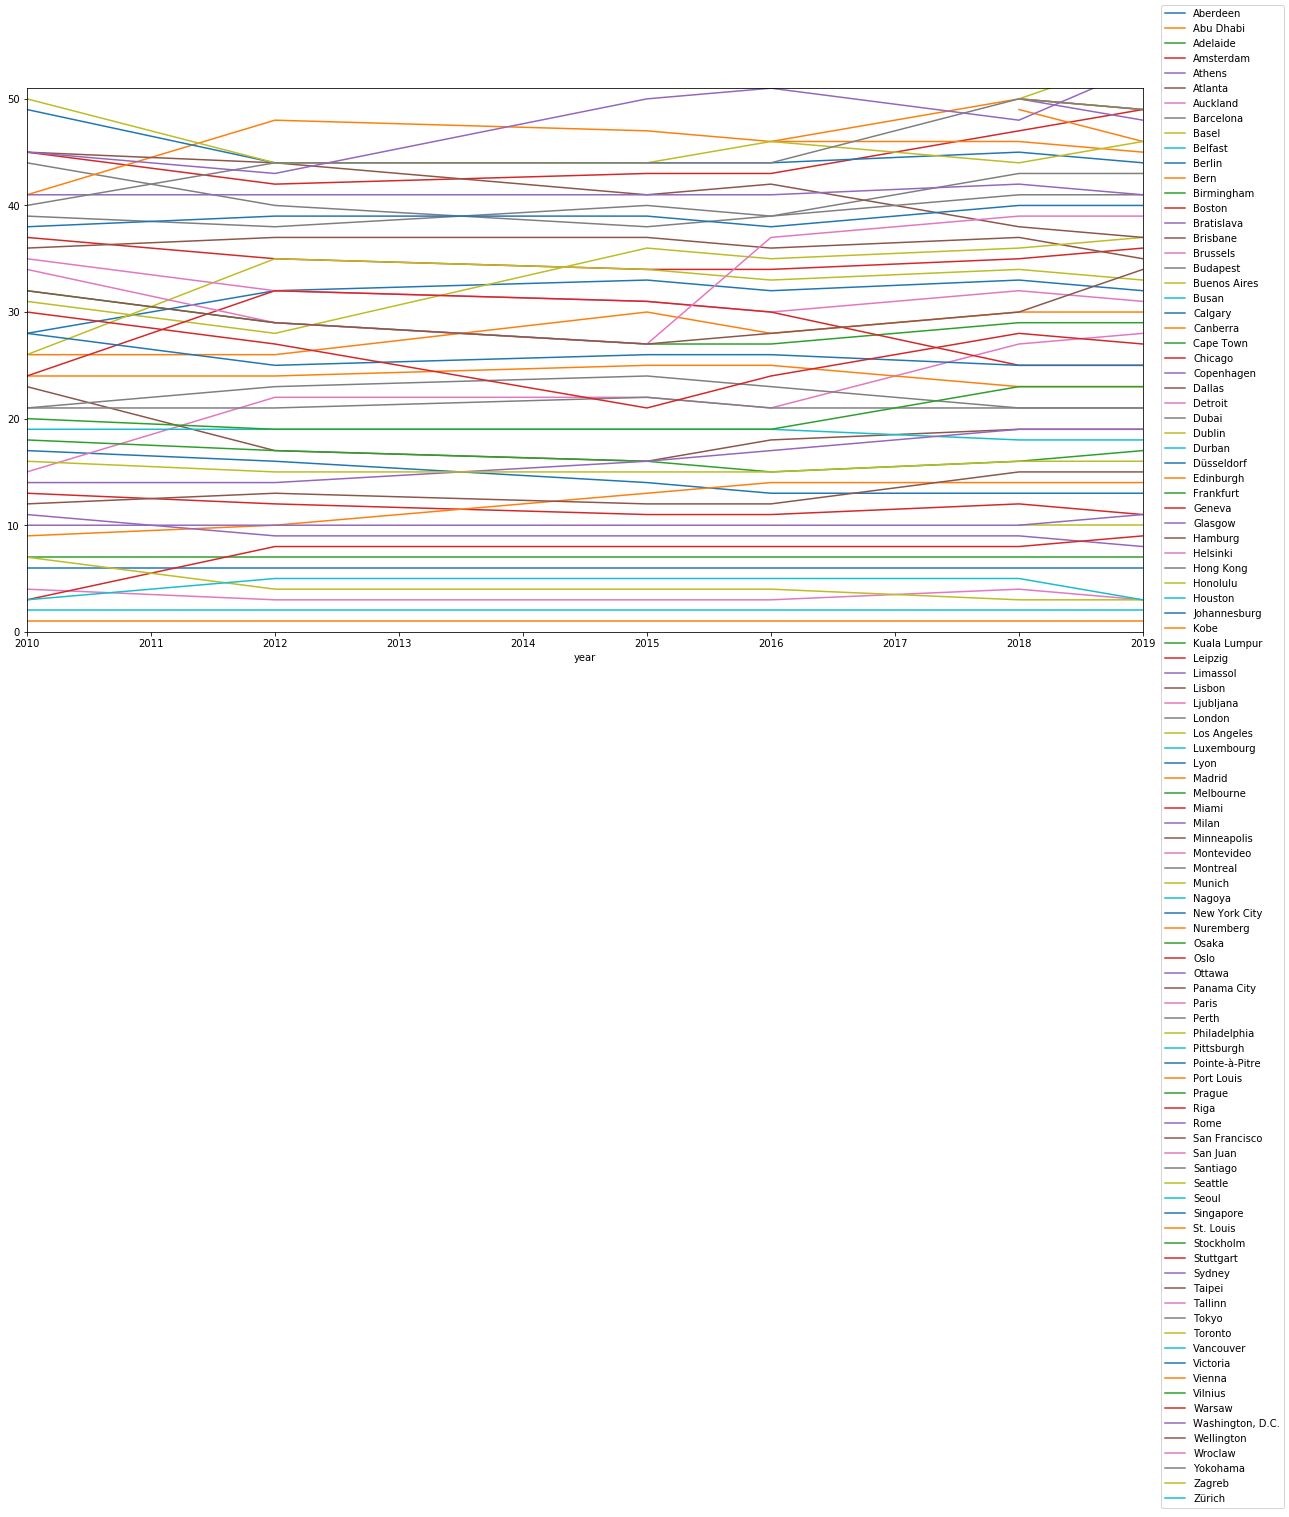

In [14]:
def getTopXCitiesByMedianThatOccurInEveryDataset(topX, dataset):
    mercer_data_topX = dataset[(dataset.groupby('City')['Rank'].transform('median') > topX - 10) & (dataset.groupby('City')['Rank'].transform('median') <= topX)]
    return mercer_data_topX
        
mercer_data_top10 = getTopXCitiesByMedianThatOccurInEveryDataset(10, mercer_data)
mercer_data_top20 = getTopXCitiesByMedianThatOccurInEveryDataset(20, mercer_data)
mercer_data_top30 = getTopXCitiesByMedianThatOccurInEveryDataset(30, mercer_data)
mercer_data_top40 = getTopXCitiesByMedianThatOccurInEveryDataset(40, mercer_data)
mercer_data_top50 = getTopXCitiesByMedianThatOccurInEveryDataset(50, mercer_data)


def plotRankingChangesOfData(cur_dataset, filename):
    fig = plt.figure(figsize=(20, 10))
    cur_dataset = cur_dataset.reset_index()
    cur_dataset.set_index(['year'], inplace=True)
    cur_dataset = cur_dataset.groupby('City')
    plt.ylim(0, 51)
    cur_dataset.Rank.plot()
    fig.legend()
    fig.savefig(filename)
    
plotRankingChangesOfData(mercer_data_top10, 'images/mercer/rankingChangeTop10.png')
plotRankingChangesOfData(mercer_data_top20, 'images/mercer/rankingChangeTop20.png')
plotRankingChangesOfData(mercer_data_top30, 'images/mercer/rankingChangeTop30.png')
plotRankingChangesOfData(mercer_data_top40, 'images/mercer/rankingChangeTop40.png')
plotRankingChangesOfData(mercer_data_top50, 'images/mercer/rankingChangeTop50.png')
plotRankingChangesOfData(mercer_data, 'images/mercer/rankingChange.png')

## Visualization of Ranking Changes in Numbeo-Data:


In contrary to mercer data you can see, that the rankings differ very much from year to year.

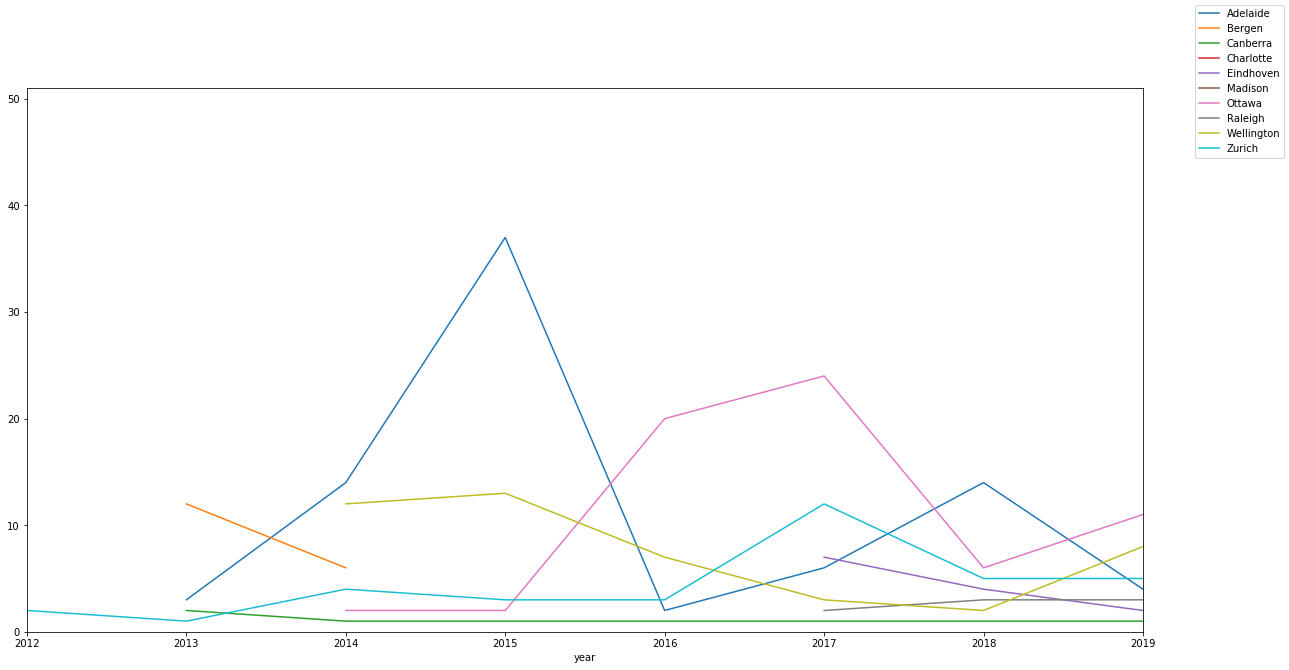

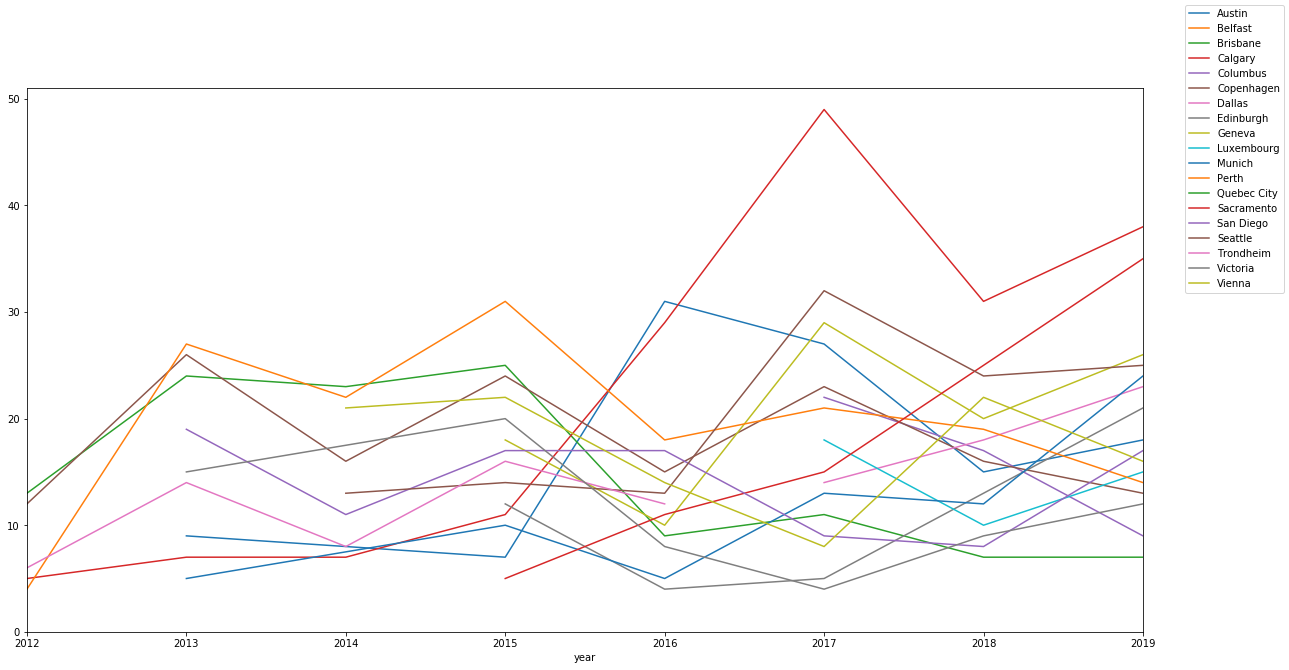

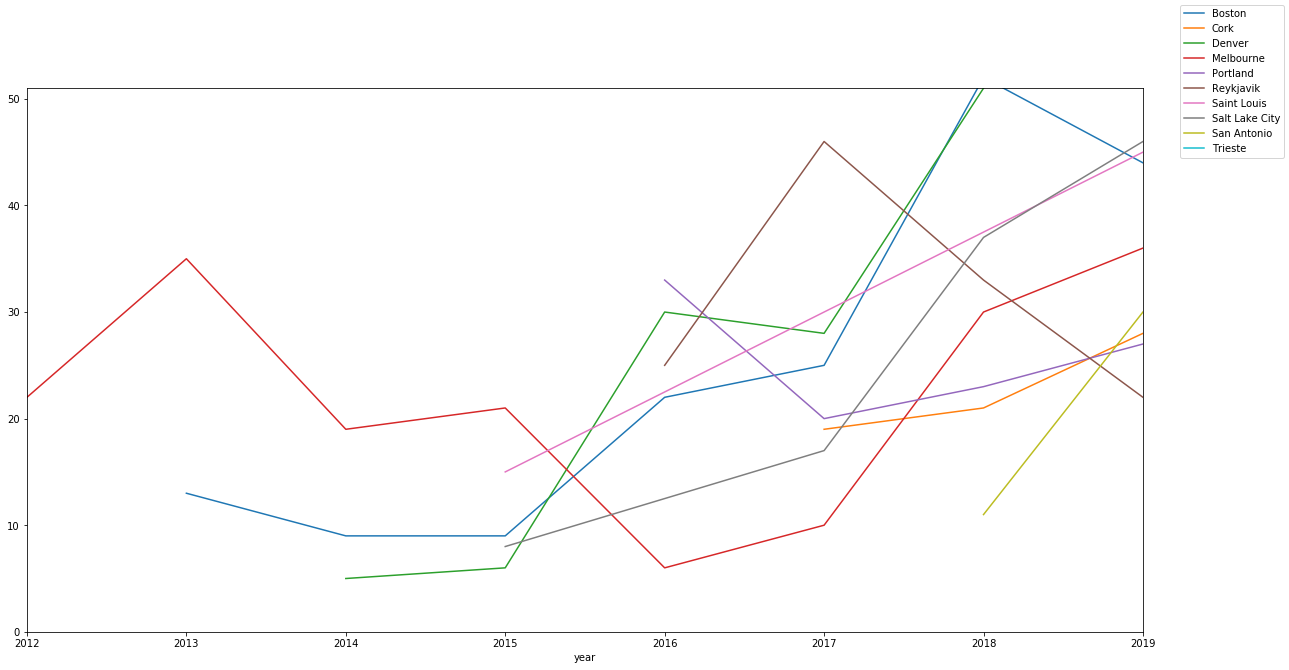

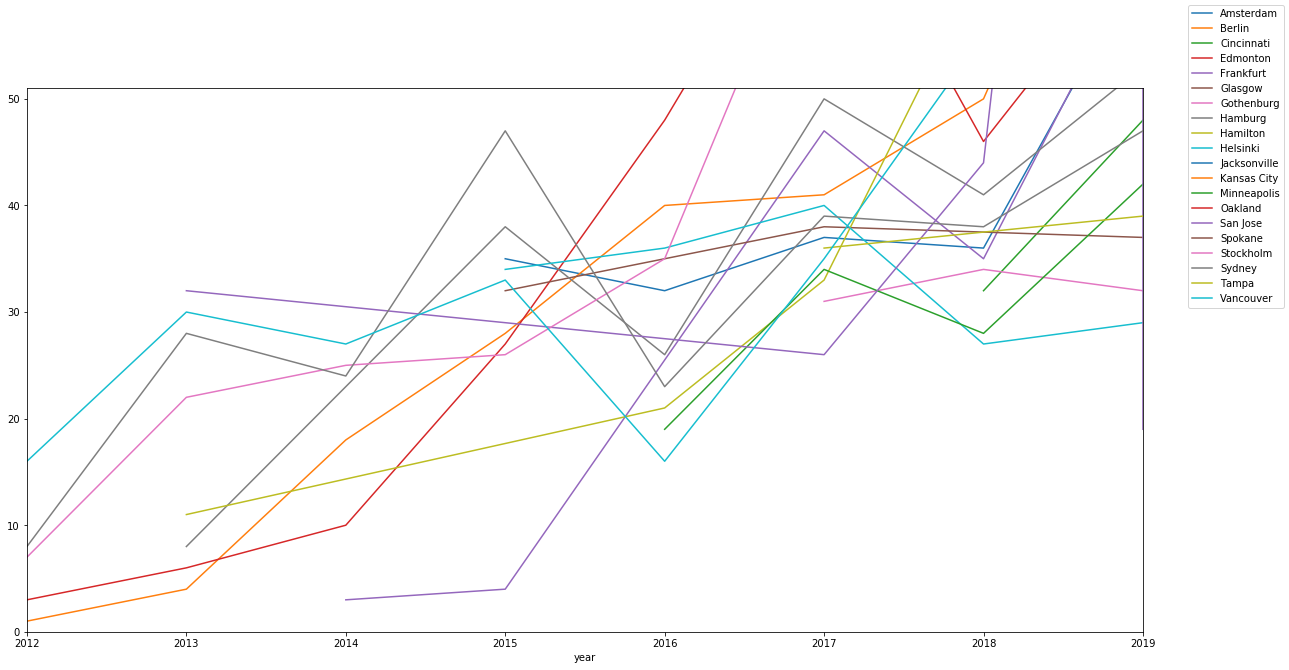

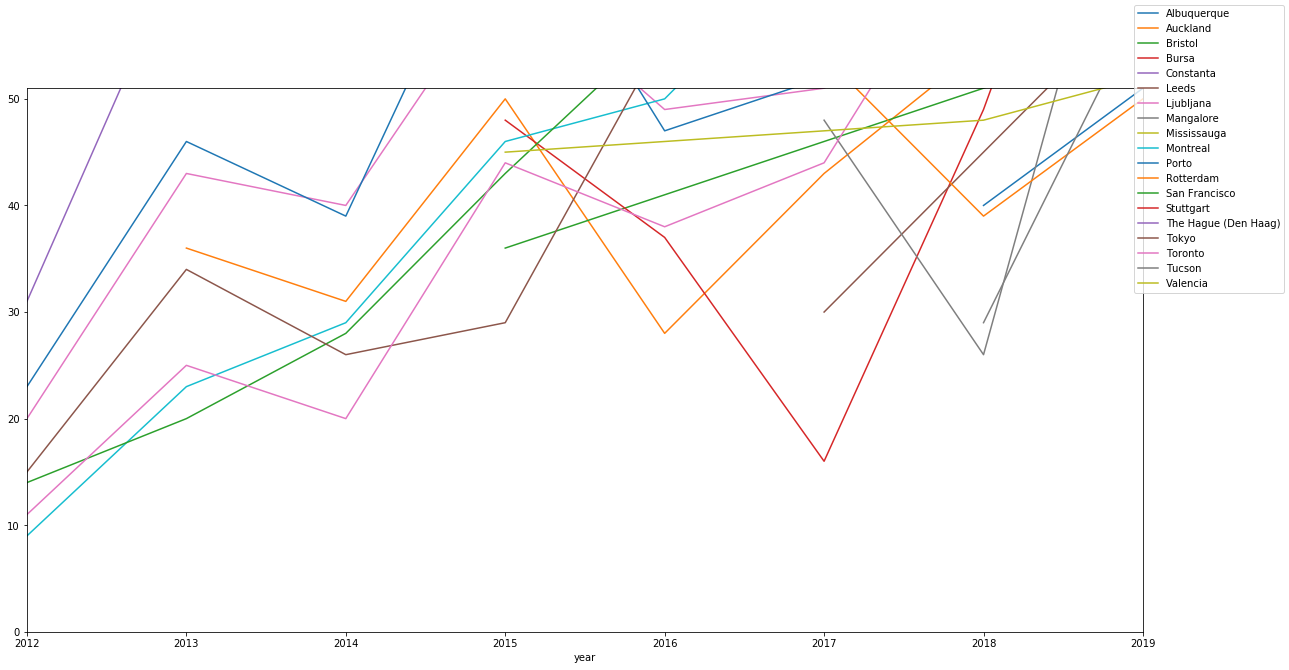

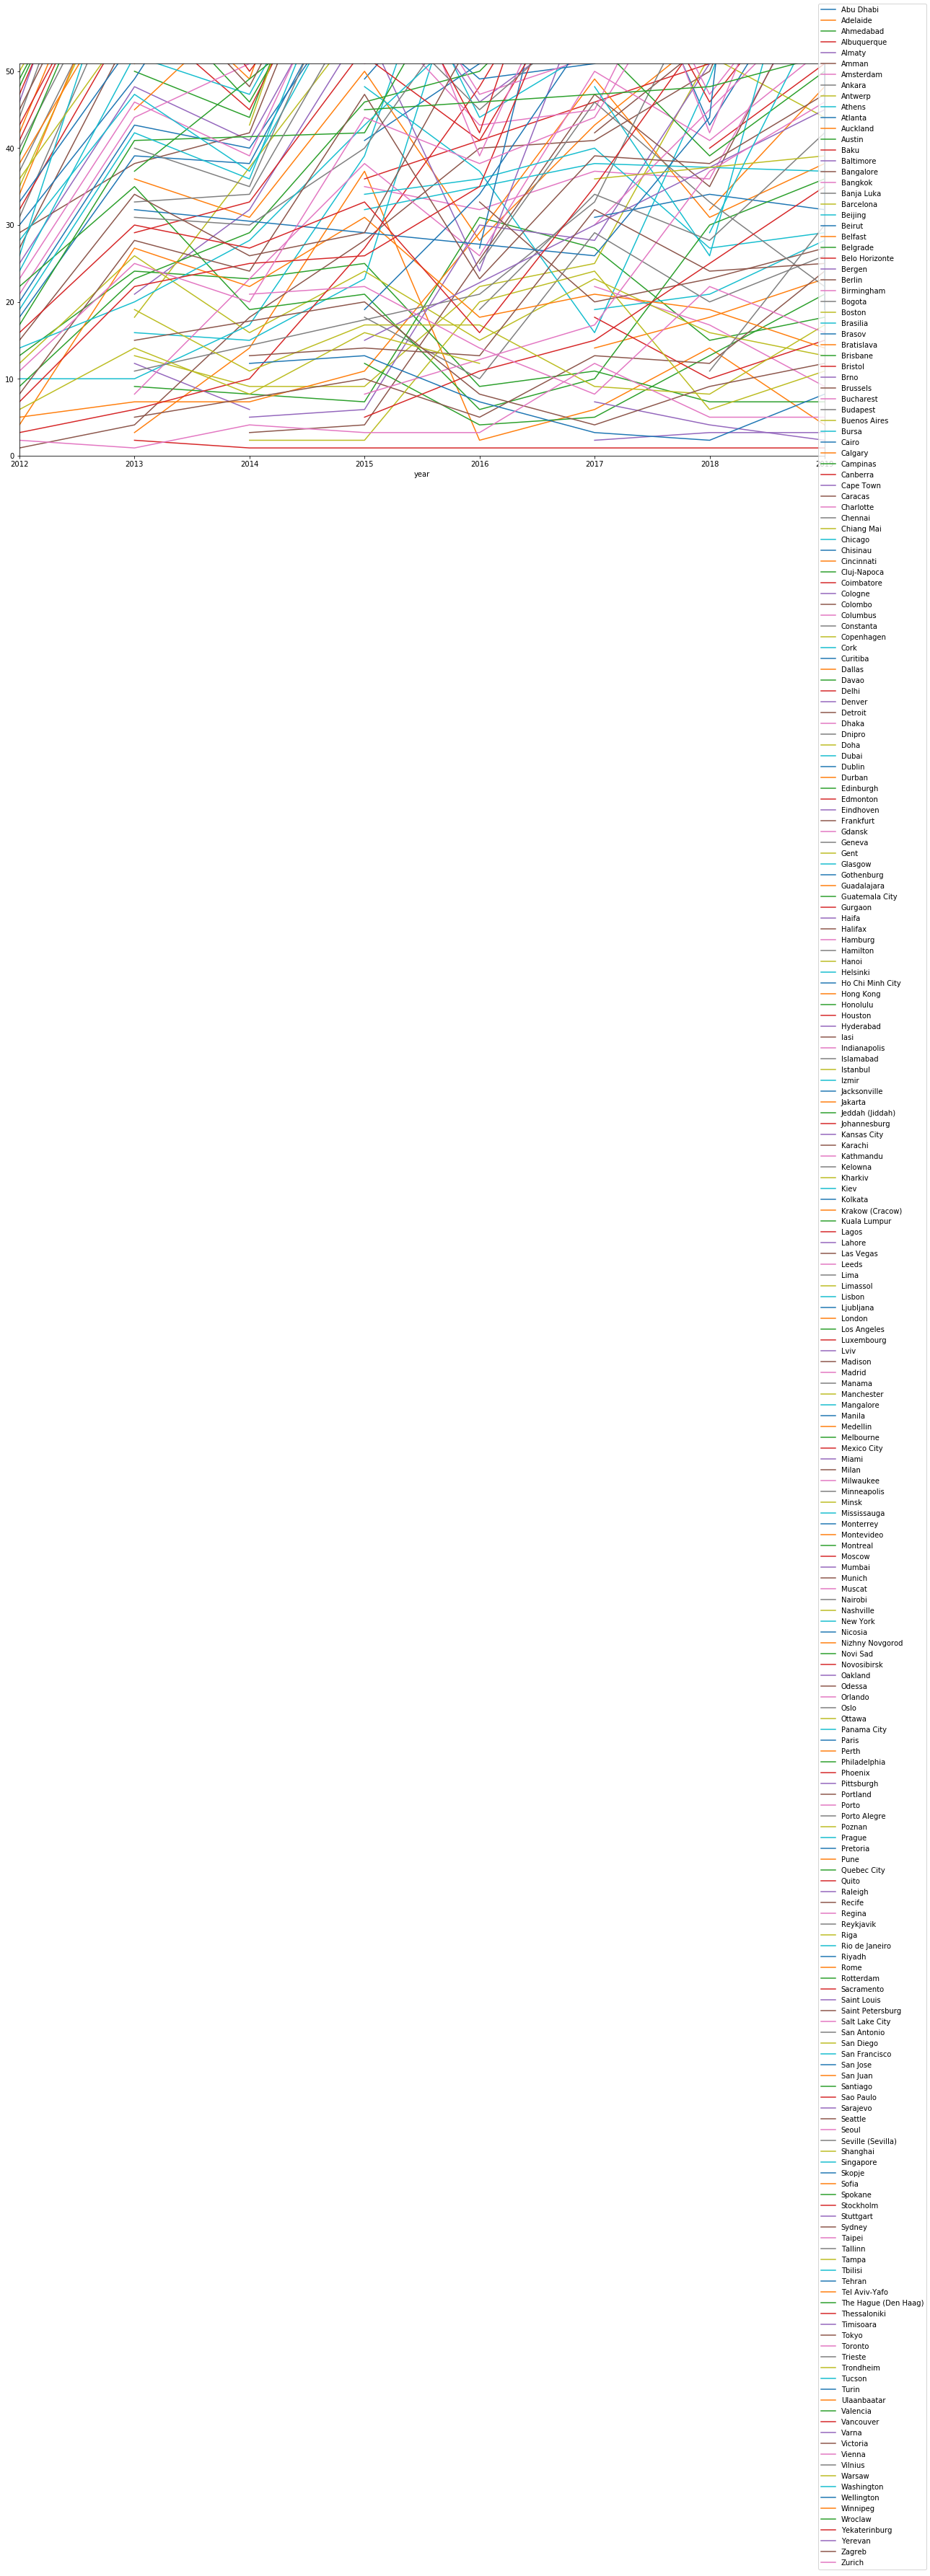

In [15]:
numbeo_data_top10 = getTopXCitiesByMedianThatOccurInEveryDataset(10, numbeo_city_data)
numbeo_data_top20 = getTopXCitiesByMedianThatOccurInEveryDataset(20, numbeo_city_data)
numbeo_data_top30 = getTopXCitiesByMedianThatOccurInEveryDataset(30, numbeo_city_data)
numbeo_data_top40 = getTopXCitiesByMedianThatOccurInEveryDataset(40, numbeo_city_data)
numbeo_data_top50 = getTopXCitiesByMedianThatOccurInEveryDataset(50, numbeo_city_data)

plotRankingChangesOfData(numbeo_data_top10, 'images/numbeo/rankingChangeTop10.png')
plotRankingChangesOfData(numbeo_data_top20, 'images/numbeo/rankingChangeTop20.png')
plotRankingChangesOfData(numbeo_data_top30, 'images/numbeo/rankingChangeTop30.png')
plotRankingChangesOfData(numbeo_data_top40, 'images/numbeo/rankingChangeTop40.png')
plotRankingChangesOfData(numbeo_data_top50, 'images/numbeo/rankingChangeTop50.png')
plotRankingChangesOfData(numbeo_city_data, 'images/numbeo/rankingChange.png')

## Calculation of mean-difference between ranking-dates of Mercer-Data:

In the following boxplots you can see for every change of year, how the ranking changes overall looked like. You can see that with mercer-data the highest ranking
changes between two year is 10 ranks.

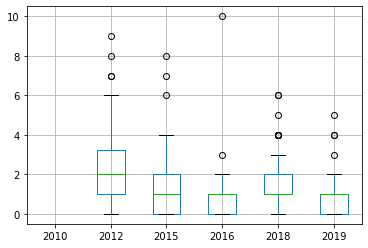

In [19]:
def calculateMedianRankingChangePerCityForMercerData():
    files = glob.glob('data/mercer_*.csv')
    datalist = []
    for file in files:
        year = int(file[12:16])
        df = pd.read_csv(file, sep=';', header=0, encoding='ISO-8859-1').assign(year=year)
        datalist.append(df)
    data = pd.concat(datalist)
    data = data.pivot(index='year', columns='City', values='Rank')
    data = data.diff()
    data = data.abs()
    data.T.boxplot()
    return data


mercer_data_groupedByCity = calculateMedianRankingChangePerCityForMercerData()

## Calculation of mean-difference between ranking-dates of Numbeo-Data:

In contrary to the boxplots of the mercer-data you can see higher ranking changes between the years with a maximum of 35 ranks. 

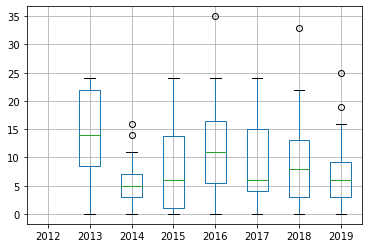

In [20]:
def calculateMedianRankingChangePerCityForNumbeoData():
    files = glob.glob('data/numbeo/quality-of-life-city/*.csv')
    datalist = []
    for file in files:
        year = int(file[33:37])
        df = pd.read_csv(file, sep=';', header=0).assign(year=year)
        datalist.append(df)
    data = pd.concat(datalist)
    data = data[data['Rank'] <= 50]
    data = data.pivot(index='year', columns='City', values='Rank')
    data = data.diff()
    data = data.abs()
    data.T.boxplot()
    return data

numbeo_data_groupedByCity = calculateMedianRankingChangePerCityForNumbeoData()

# How do these rankings correlate with each other?

The used methods for comparing the rankings with each other is with inter rater reliabiliy where the used methods are Cohens Kappa, Alpha and Scotts. 
As you can see, there is no real correlation  betwenn the datasets in any year. 

In [21]:
def calculateInterRater_ReliabilityKappa(year):
    numbeoDataCur = numbeo_city_data[(numbeo_city_data['Rank'] <= 50)  & (numbeo_city_data.index.get_level_values(0) == year)]
    mercerDataCur = mercer_data[(mercer_data['Rank'] <= 50) & (mercer_data.index.get_level_values(0) == year)]
    
    numbeoDataCur = numbeoDataCur[numbeoDataCur.index.get_level_values(1).isin(mercerDataCur.index.get_level_values(1))]
    mercerDataCur = mercerDataCur[mercerDataCur.index.get_level_values(1).isin(numbeoDataCur.index.get_level_values(1))] 
    
    numbeoDataCur.sort_values(['City'], ascending=True, inplace=True)
    mercerDataCur.sort_values(['City'], ascending=True, inplace=True)
    
    taskdata=[[0,str(i),str(numbeoDataCur.Rank[i])] for i in range(0,len(numbeoDataCur.Rank))] + [[1,str(i),str(mercerDataCur.Rank[i])] for i in range(0,len(mercerDataCur.Rank))]
    ratingtask = agreement.AnnotationTask(data=taskdata)
    print(str(year) + ": kappa " +str(ratingtask.kappa()))
    print(str(year) + ": alpha " +str(ratingtask.alpha()))
    print(str(year) + ": scotts " + str(ratingtask.pi()))
    
calculateInterRater_ReliabilityKappa(2012)
calculateInterRater_ReliabilityKappa(2015)
calculateInterRater_ReliabilityKappa(2016)
calculateInterRater_ReliabilityKappa(2018)
calculateInterRater_ReliabilityKappa(2019)


2012: kappa 0.030612244897959183
2012: alpha 0.03766233766233773
2012: scotts 0.012987012987012991
2015: kappa -0.01939393939393939
2015: alpha -0.013488657265481319
2015: scotts -0.03126916002452483
2016: kappa -0.01960784313725491
2016: alpha -0.011441647597253857
2016: scotts -0.03127383676582761
2018: kappa -0.020833333333333332
2018: alpha -0.011750881316098694
2018: scotts -0.036427732079905996
2019: kappa -0.017811704834605598
2019: alpha -0.009055627425614388
2019: scotts -0.03492884864165589
